In [1]:
import pandas as pd
import numpy as np

# For plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

# For handling CSV files
import csv

# Machine learning model selection a nd preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize

# Machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier  # Import XGBoost

# Model evaluation metrics
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, 
    roc_curve, auc, confusion_matrix, classification_report
)

# Saving and loading models
import joblib

# Utility modules
import time
from itertools import cycle
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix



In [2]:
df=pd.read_csv("ddos/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")




In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [4]:
len(df)

225745

In [5]:
df.columns



Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [6]:
# Remove the spaces before the column names
df.columns = df.columns.str.strip()

In [7]:
df["Label"].value_counts()

Label
DDoS      128027
BENIGN     97718
Name: count, dtype: int64

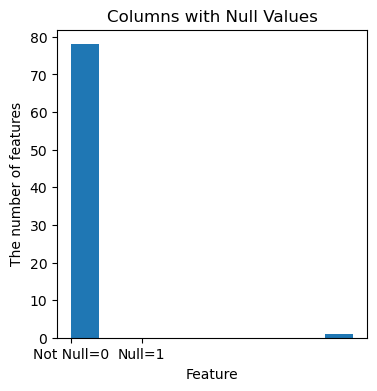

In [8]:
#Checking the null values in the dataset.
plt.figure(1,figsize=( 4,4))
plt.hist( df.isna().sum())
# Set the title and axis labels
plt.xticks([0, 1], labels=['Not Null=0', 'Null=1'])
plt.title('Columns with Null Values')
plt.xlabel('Feature')
plt.ylabel('The number of features')

# Show the plot
plt.show()

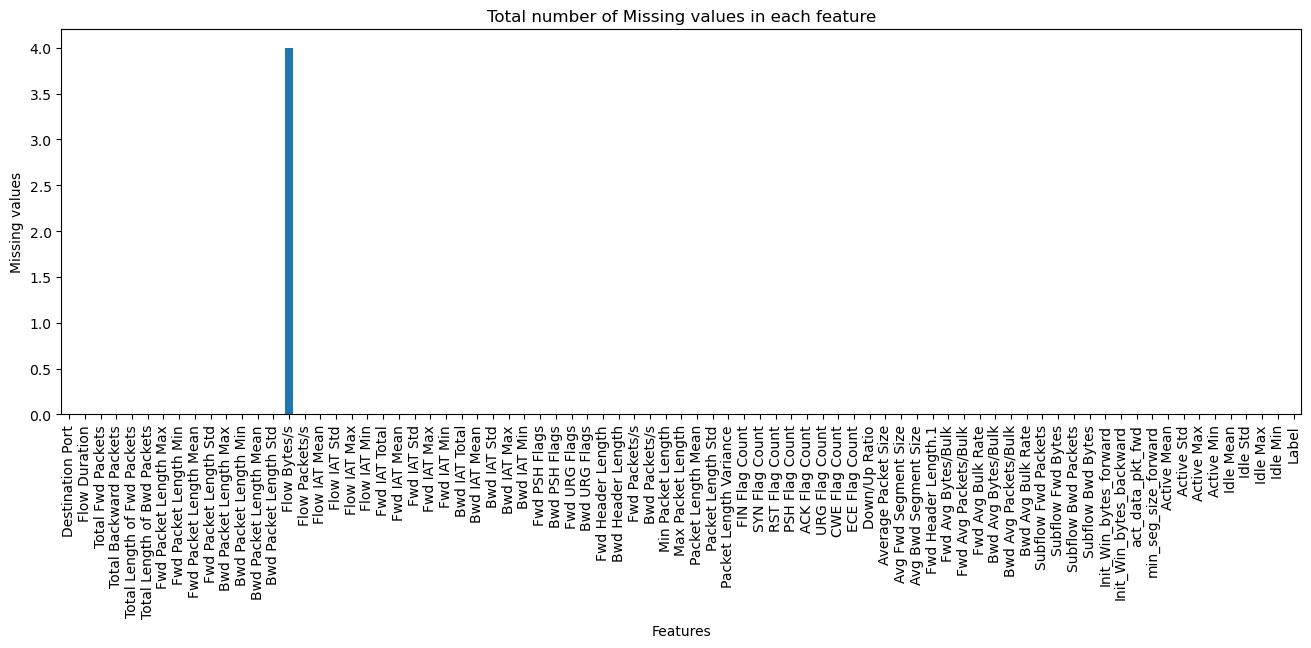

In [9]:
#checking which column has the null value in the dataset

def plotMissingValues(dataframe):
    missing_values = dataframe.isnull().sum()  # Counting null values for each column
    fig = plt.figure(figsize=(16, 5))
    missing_values.plot(kind='bar')
    plt.xlabel("Features")
    plt.ylabel("Missing values")
    plt.title("Total number of Missing values in each feature")
    plt.show()

plotMissingValues(df)

In [10]:
## Removing the null values
data_f=df.dropna()



data_f = df.replace([np.inf, -np.inf], np.nan).dropna()  # Handle infinite values

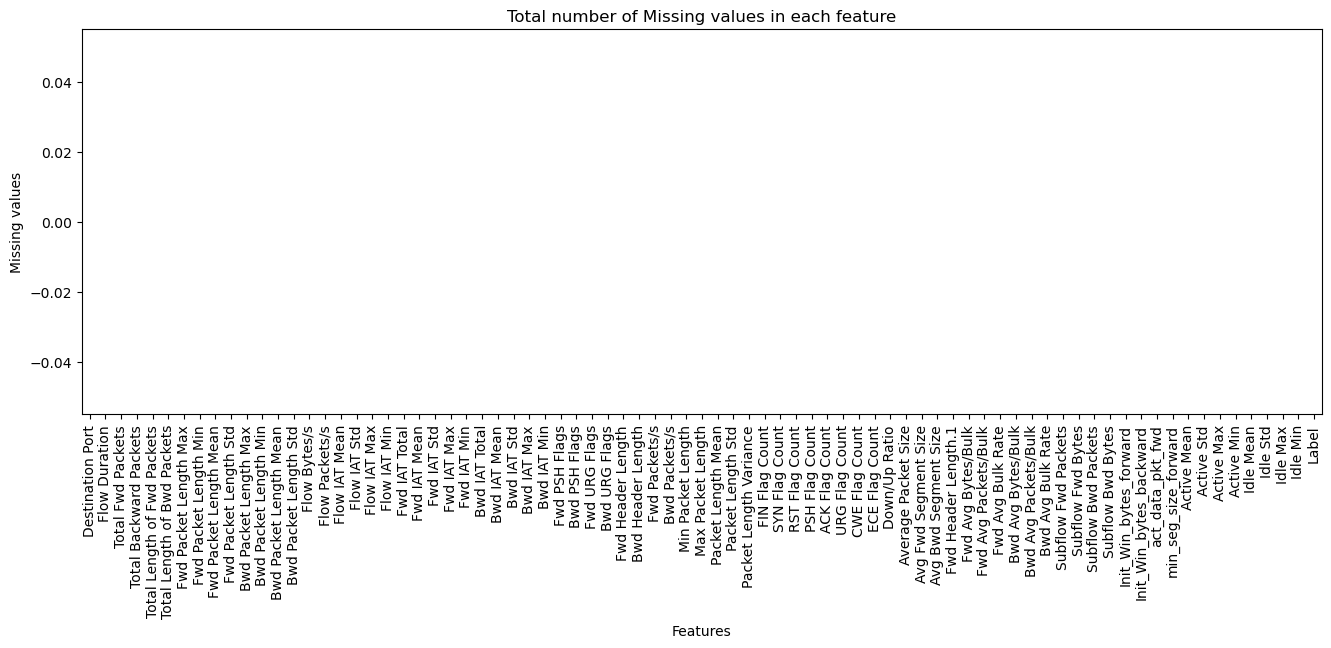

In [11]:
plotMissingValues(data_f)


In [12]:
# Convert the labels in the DataFrame to numerical values
data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS': 1})


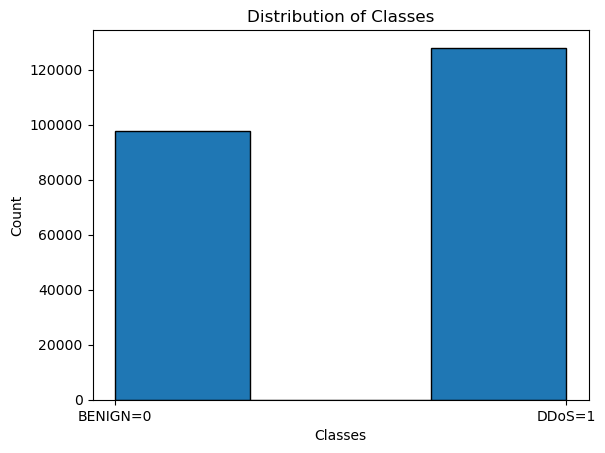

In [13]:
# Print the DataFrame

plt.hist(data_f['Label'], bins=[0, 0.3,0.7,1], edgecolor='black')  # Specify bins as [0, 1]
plt.xticks([0, 1], labels=['BENIGN=0', 'DDoS=1'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title ('Distribution of Classes')
plt.show()

In [14]:
# Split data into features and target variable
X = data_f.drop('Label', axis=1) #input data
y = data_f['Label'] ## target column

In [15]:
# Data scaling Standardization for the models that relies on distance- based calculation such as Logistic Regression,SVM etc 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [17]:
print("The train dataset size = ",X_train.shape)
print("The test dataset size = ",X_test.shape)

The train dataset size =  (180568, 78)
The test dataset size =  (45143, 78)


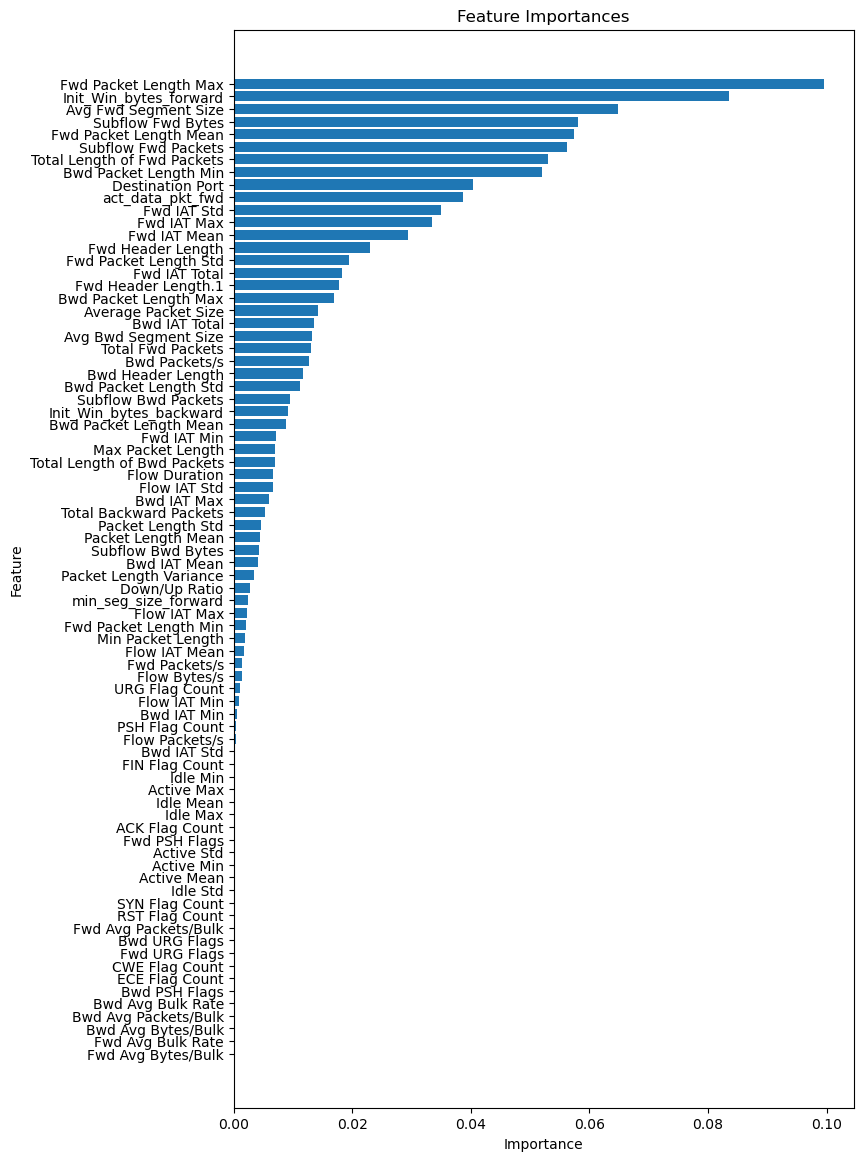

In [18]:
# Feature Selection using Random Forest Feature Importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_
importance_table = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})
importance_table = importance_table.sort_values(by='Importance', ascending=False)

# Plot feature importances horizontally
plt.figure(figsize=(8, 14))
plt.barh(importance_table["Feature"], importance_table["Importance"], align="center")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

In [19]:

# Select top 10 important features
top_53_features = importance_table['Feature'].head(53).values
print("Top 53 Important Features:", top_53_features)


Top 53 Important Features: ['Fwd Packet Length Max' 'Init_Win_bytes_forward' 'Avg Fwd Segment Size'
 'Subflow Fwd Bytes' 'Fwd Packet Length Mean' 'Subflow Fwd Packets'
 'Total Length of Fwd Packets' 'Bwd Packet Length Min' 'Destination Port'
 'act_data_pkt_fwd' 'Fwd IAT Std' 'Fwd IAT Max' 'Fwd IAT Mean'
 'Fwd Header Length' 'Fwd Packet Length Std' 'Fwd IAT Total'
 'Fwd Header Length.1' 'Bwd Packet Length Max' 'Average Packet Size'
 'Bwd IAT Total' 'Avg Bwd Segment Size' 'Total Fwd Packets'
 'Bwd Packets/s' 'Bwd Header Length' 'Bwd Packet Length Std'
 'Subflow Bwd Packets' 'Init_Win_bytes_backward' 'Bwd Packet Length Mean'
 'Fwd IAT Min' 'Max Packet Length' 'Total Length of Bwd Packets'
 'Flow Duration' 'Flow IAT Std' 'Bwd IAT Max' 'Total Backward Packets'
 'Packet Length Std' 'Packet Length Mean' 'Subflow Bwd Bytes'
 'Bwd IAT Mean' 'Packet Length Variance' 'Down/Up Ratio'
 'min_seg_size_forward' 'Flow IAT Max' 'Fwd Packet Length Min'
 'Min Packet Length' 'Flow IAT Mean' 'Fwd Packets/s'

In [20]:
# Update X_train and X_test to include only the top features
X_train_selected = X_train[:, np.isin(X.columns, top_53_features)]
X_test_selected = X_test[:, np.isin(X.columns, top_53_features)]

In [29]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

def evaluate_model(model, X_train_selected, X_test_selected, y_train, y_test, model_name, y_probs, top_8_features):
    """Train and evaluate a model on selected features."""
    start_time = time.time()  # Start timing the training process
    model.fit(X_train_selected, y_train)  # Train the model on the selected features
    end_time = time.time()  # End timing the training process
    training_time = (end_time - start_time) / 60  # Convert seconds to minutes

    y_pred = model.predict(X_test_selected)  # Make predictions on test data

    # Get predicted probabilities if the model supports it (for ROC curve)
    y_prob = model.predict_proba(X_test_selected)[:, 1] if hasattr(model, "predict_proba") else None
    y_probs[model_name] = y_prob  # Store the predicted probabilities for later use (e.g., ROC)

    # Calculate various performance metrics
    accuracy = accuracy_score(y_test, y_pred) * 100  # Accuracy in percentage
    f1 = f1_score(y_test, y_pred) * 100  # F1 score in percentage
    precision = precision_score(y_test, y_pred) * 100  # Precision in percentage
    recall = recall_score(y_test, y_pred) * 100  # Recall in percentage

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)  # Calculate the confusion matrix
    tn, fp, fn, tp = cm.ravel()  # Extract True Negatives, False Positives, False Negatives, True Positives

    # Calculate False Alarm Rate (FAR)
    false_alarm_rate = fp / (fp + tn) * 100 if (fp + tn) > 0 else 0  # FAR in percentage

    # Print the evaluation metrics 
    print(f'\n{model_name} Metrics:')
    print(f'Training Time: {training_time:.2f} minutes')  # Display training time in minutes
    print(f'Accuracy: {accuracy:.2f}%')  # Display accuracy as percentage
    print(f'F1 Score: {f1:.2f}%')  # Display F1 score as percentage 
    print(f'Precision: {precision:.2f}%')  # Display precision as percentage
    print(f'Recall: {recall:.2f}%')  # Display recall as percentage
    print(f'False Alarm Rate (FAR): {false_alarm_rate:.2f}%')  # Display FAR as percentage

    # Print selected features for interpretability
    print("\nSelected Features Used for Training:")
    print(top_53_features)

    # Generate and display the confusion matrix
    plt.figure(figsize=(6, 4))  
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'DDoS'], yticklabels=['Benign', 'DDoS'])
    plt.title(f'{model_name} Confusion Matrix')  # Set the title of the matrix
    plt.xlabel('Predicted')  
    plt.ylabel('True')  
    plt.show()


In [30]:
# Dictionary to store probabilities for ROC curve
y_probs = {}


Random Forest Metrics:
Training Time: 0.55 minutes
Accuracy: 99.99%
F1 Score: 99.99%
Precision: 100.00%
Recall: 99.99%
False Alarm Rate (FAR): 0.00%

Selected Features Used for Training:
['Fwd Packet Length Max' 'Init_Win_bytes_forward' 'Avg Fwd Segment Size'
 'Subflow Fwd Bytes' 'Fwd Packet Length Mean' 'Subflow Fwd Packets'
 'Total Length of Fwd Packets' 'Bwd Packet Length Min' 'Destination Port'
 'act_data_pkt_fwd' 'Fwd IAT Std' 'Fwd IAT Max' 'Fwd IAT Mean'
 'Fwd Header Length' 'Fwd Packet Length Std' 'Fwd IAT Total'
 'Fwd Header Length.1' 'Bwd Packet Length Max' 'Average Packet Size'
 'Bwd IAT Total' 'Avg Bwd Segment Size' 'Total Fwd Packets'
 'Bwd Packets/s' 'Bwd Header Length' 'Bwd Packet Length Std'
 'Subflow Bwd Packets' 'Init_Win_bytes_backward' 'Bwd Packet Length Mean'
 'Fwd IAT Min' 'Max Packet Length' 'Total Length of Bwd Packets'
 'Flow Duration' 'Flow IAT Std' 'Bwd IAT Max' 'Total Backward Packets'
 'Packet Length Std' 'Packet Length Mean' 'Subflow Bwd Bytes'
 'Bwd IAT M

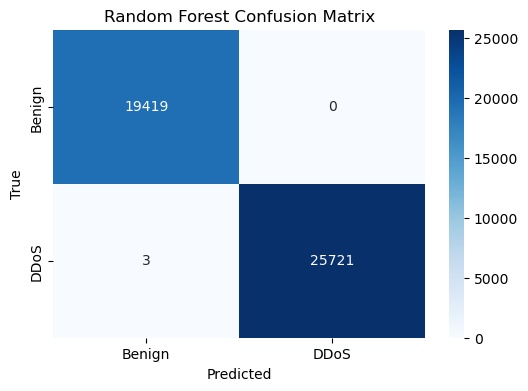

In [31]:
# 1. Train and Evaluate Random Forest
rf_model_selected = RandomForestClassifier(n_estimators=50, random_state=42)
evaluate_model(rf_model, X_train_selected, X_test_selected, y_train, y_test, "Random Forest", y_probs, top_53_features)


Logistic Regression Metrics:
Training Time: 0.05 minutes
Accuracy: 99.76%
F1 Score: 99.79%
Precision: 99.71%
Recall: 99.87%
False Alarm Rate (FAR): 0.38%

Selected Features Used for Training:
['Fwd Packet Length Max' 'Init_Win_bytes_forward' 'Avg Fwd Segment Size'
 'Subflow Fwd Bytes' 'Fwd Packet Length Mean' 'Subflow Fwd Packets'
 'Total Length of Fwd Packets' 'Bwd Packet Length Min' 'Destination Port'
 'act_data_pkt_fwd' 'Fwd IAT Std' 'Fwd IAT Max' 'Fwd IAT Mean'
 'Fwd Header Length' 'Fwd Packet Length Std' 'Fwd IAT Total'
 'Fwd Header Length.1' 'Bwd Packet Length Max' 'Average Packet Size'
 'Bwd IAT Total' 'Avg Bwd Segment Size' 'Total Fwd Packets'
 'Bwd Packets/s' 'Bwd Header Length' 'Bwd Packet Length Std'
 'Subflow Bwd Packets' 'Init_Win_bytes_backward' 'Bwd Packet Length Mean'
 'Fwd IAT Min' 'Max Packet Length' 'Total Length of Bwd Packets'
 'Flow Duration' 'Flow IAT Std' 'Bwd IAT Max' 'Total Backward Packets'
 'Packet Length Std' 'Packet Length Mean' 'Subflow Bwd Bytes'
 'Bwd 

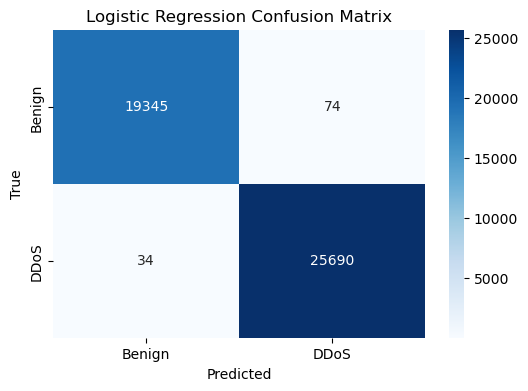

In [24]:
# 2. Train and Evaluate Logistic Regression
log_reg_model = LogisticRegression(max_iter=200, random_state=42)
evaluate_model(log_reg_model, X_train_selected, X_test_selected, y_train, y_test, "Logistic Regression", y_probs, top_53_features)


XGBoost Metrics:
Training Time: 0.02 minutes
Accuracy: 100.00%
F1 Score: 100.00%
Precision: 100.00%
Recall: 100.00%
False Alarm Rate (FAR): 0.01%

Selected Features Used for Training:
['Fwd Packet Length Max' 'Init_Win_bytes_forward' 'Avg Fwd Segment Size'
 'Subflow Fwd Bytes' 'Fwd Packet Length Mean' 'Subflow Fwd Packets'
 'Total Length of Fwd Packets' 'Bwd Packet Length Min' 'Destination Port'
 'act_data_pkt_fwd' 'Fwd IAT Std' 'Fwd IAT Max' 'Fwd IAT Mean'
 'Fwd Header Length' 'Fwd Packet Length Std' 'Fwd IAT Total'
 'Fwd Header Length.1' 'Bwd Packet Length Max' 'Average Packet Size'
 'Bwd IAT Total' 'Avg Bwd Segment Size' 'Total Fwd Packets'
 'Bwd Packets/s' 'Bwd Header Length' 'Bwd Packet Length Std'
 'Subflow Bwd Packets' 'Init_Win_bytes_backward' 'Bwd Packet Length Mean'
 'Fwd IAT Min' 'Max Packet Length' 'Total Length of Bwd Packets'
 'Flow Duration' 'Flow IAT Std' 'Bwd IAT Max' 'Total Backward Packets'
 'Packet Length Std' 'Packet Length Mean' 'Subflow Bwd Bytes'
 'Bwd IAT Mean

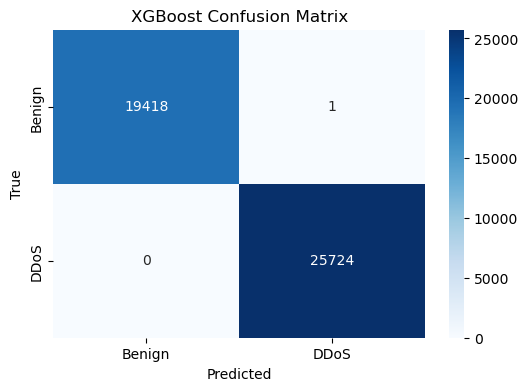

In [25]:
from xgboost import XGBClassifier

# Train XGBoost Classifier
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)  # Removed 'use_label_encoder'
evaluate_model(xgb_model, X_train_selected, X_test_selected, y_train, y_test, "XGBoost", y_probs , top_53_features)



Naive Bayes  Metrics:
Training Time: 0.01 minutes
Accuracy: 98.76%
F1 Score: 98.92%
Precision: 97.98%
Recall: 99.88%
False Alarm Rate (FAR): 2.73%

Selected Features Used for Training:
['Fwd Packet Length Max' 'Init_Win_bytes_forward' 'Avg Fwd Segment Size'
 'Subflow Fwd Bytes' 'Fwd Packet Length Mean' 'Subflow Fwd Packets'
 'Total Length of Fwd Packets' 'Bwd Packet Length Min' 'Destination Port'
 'act_data_pkt_fwd' 'Fwd IAT Std' 'Fwd IAT Max' 'Fwd IAT Mean'
 'Fwd Header Length' 'Fwd Packet Length Std' 'Fwd IAT Total'
 'Fwd Header Length.1' 'Bwd Packet Length Max' 'Average Packet Size'
 'Bwd IAT Total' 'Avg Bwd Segment Size' 'Total Fwd Packets'
 'Bwd Packets/s' 'Bwd Header Length' 'Bwd Packet Length Std'
 'Subflow Bwd Packets' 'Init_Win_bytes_backward' 'Bwd Packet Length Mean'
 'Fwd IAT Min' 'Max Packet Length' 'Total Length of Bwd Packets'
 'Flow Duration' 'Flow IAT Std' 'Bwd IAT Max' 'Total Backward Packets'
 'Packet Length Std' 'Packet Length Mean' 'Subflow Bwd Bytes'
 'Bwd IAT Mea

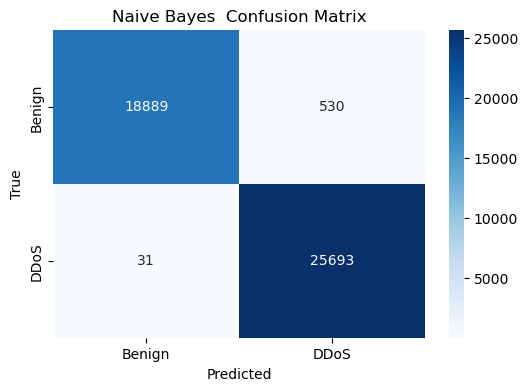

In [26]:
from sklearn.naive_bayes import GaussianNB  # Import the Gaussian Naive Bayes model
# Create a Naive Bayes model (Gaussian Naive Bayes in this case)
naive_bayes_model = GaussianNB()

# Train & Evaluate Naive Bayes Model with Selected Features
evaluate_model(naive_bayes_model, X_train_selected, X_test_selected, y_train, y_test, "Naive Bayes ", y_probs, top_53_features)

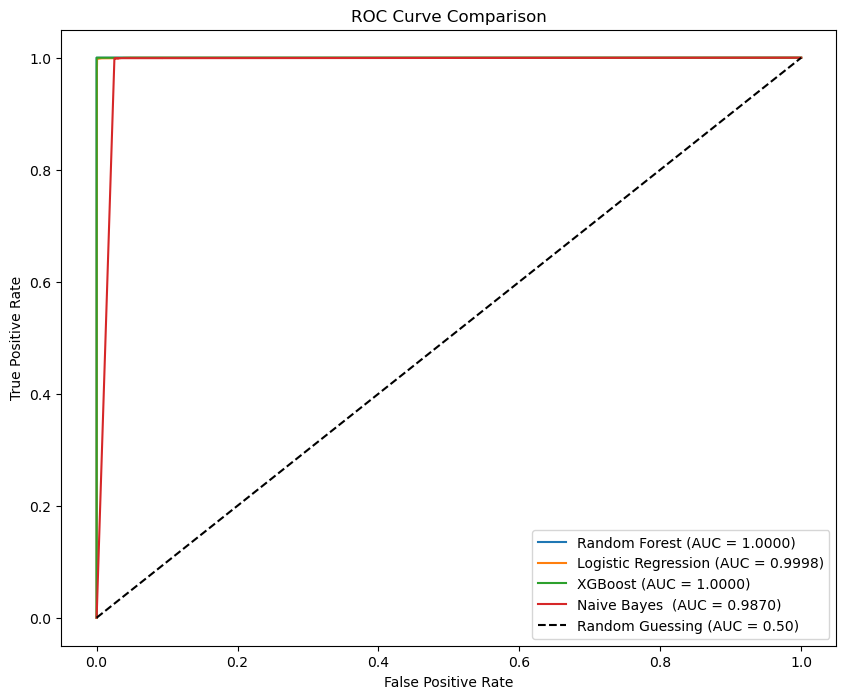

In [27]:
# Plot ROC Curves for all models
plt.figure(figsize=(10, 8))
for model_name, y_prob in y_probs.items():
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing (AUC = 0.50)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()